<a href="https://colab.research.google.com/github/satyashah/News-Based-Stock-Portfolio/blob/main/NewsPorfolioDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from ast import literal_eval
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
data = pd.read_csv("mentions.csv")
data = data.dropna()
data = data[data["Tickers Mentioned"] != "[]"]

In [ ]:
ticks = pd.read_csv("tickList.csv", encoding='latin-1')
ticks = ticks.drop(columns = ["Company Name", "Industry", "Market Cap"])
ticks.columns = ["tick"]
ticks["count"] = 0
ticks.head()

,tick,count
0,A,0
1,AA,0
2,AAC,0
3,AACG,0
4,AACI,0


In [ ]:
orgsList = data["Organization"].unique()

In [ ]:
plt.rcParams['figure.figsize'] = (21, 6)

In [ ]:
def get_ticDist(df):
  tickArr = []
  for val in df["Tickers Mentioned"]:
    val = literal_eval(val)
    tickArr+=val

  tick, count = np.unique(tickArr, return_counts=True)
  
  uniDf = pd.DataFrame(columns = ["tick", "count"])
  uniDf["tick"] = tick
  uniDf["count"] = count

  return uniDf

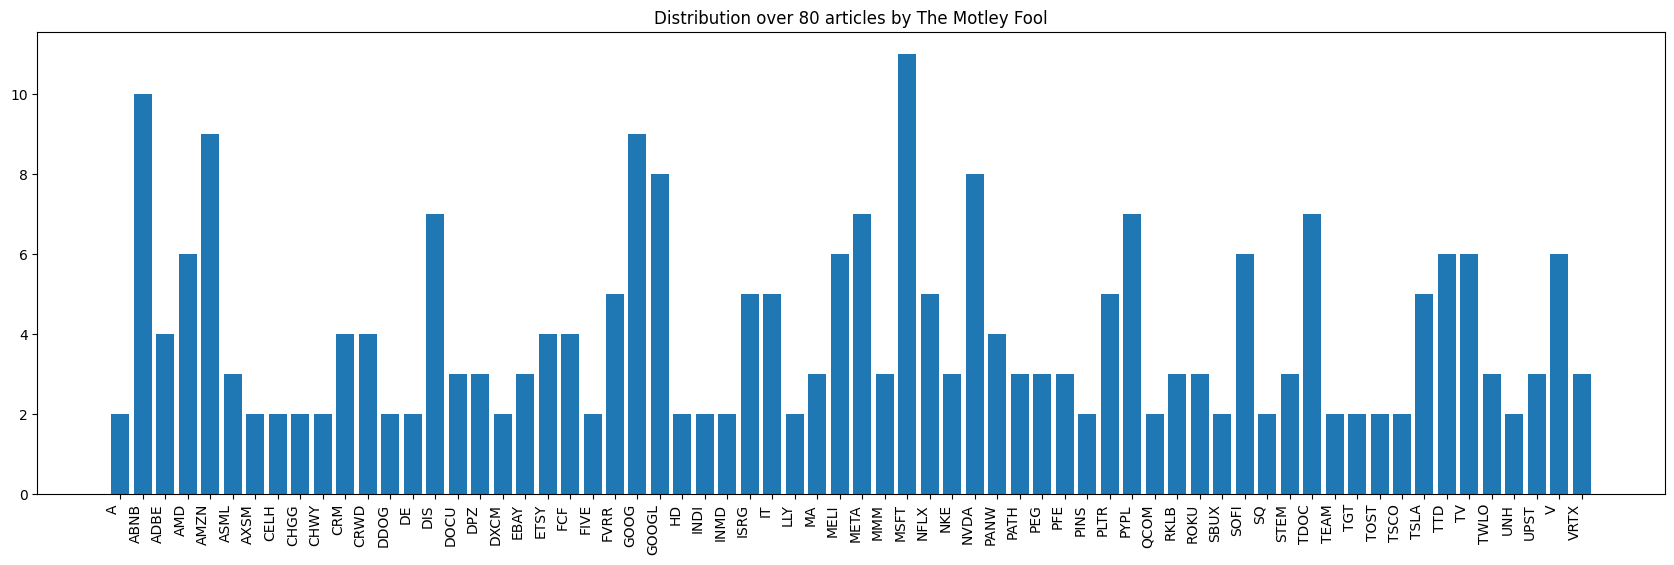

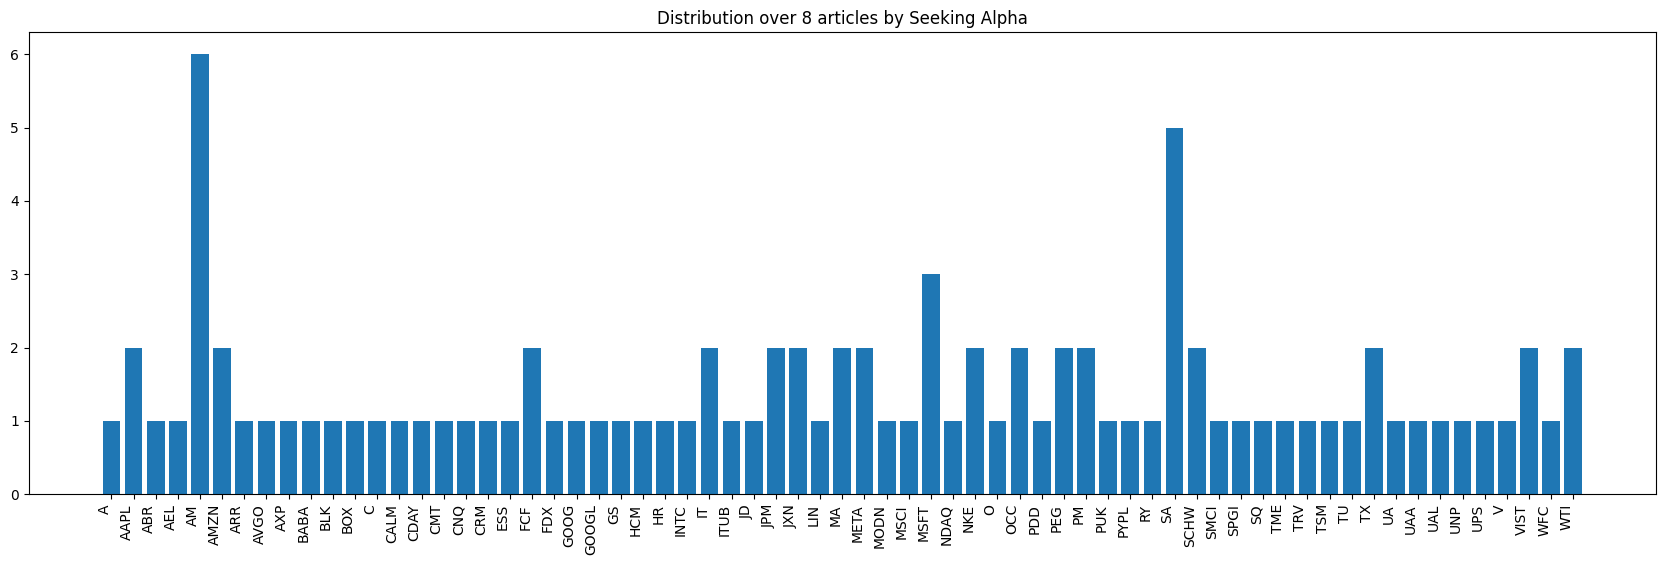

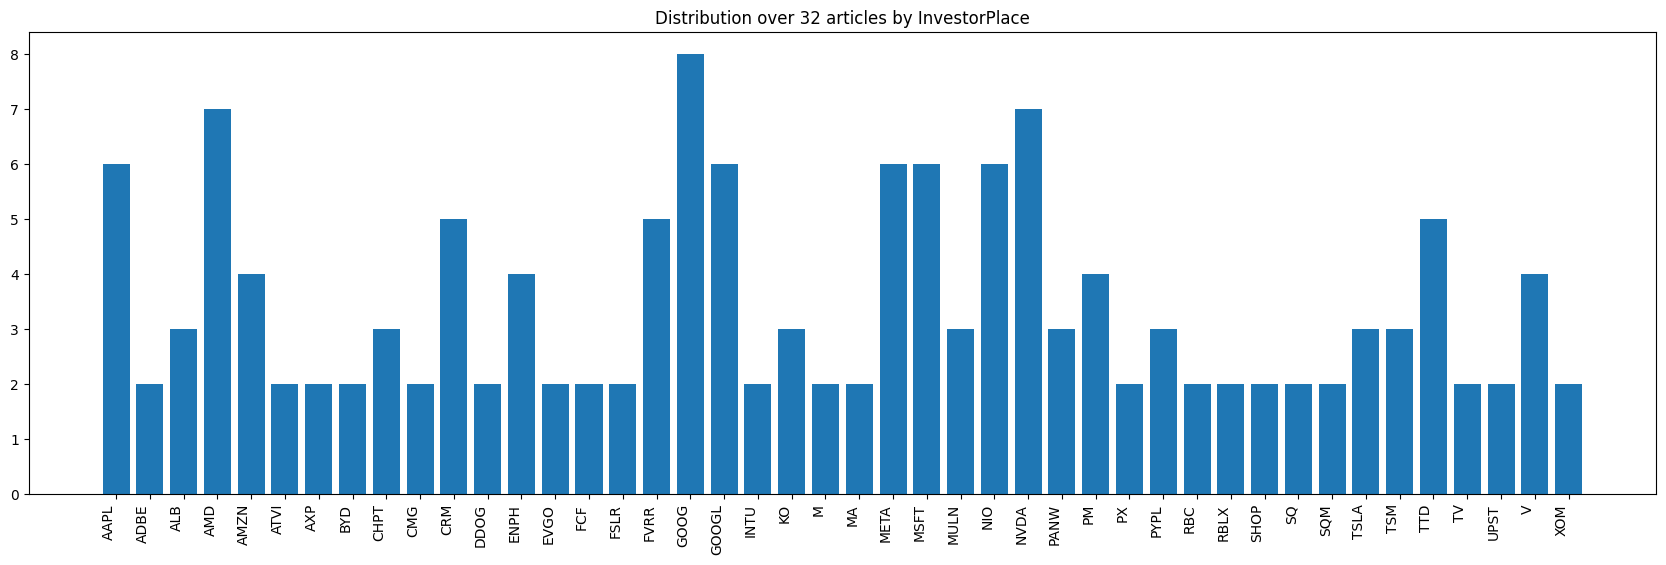

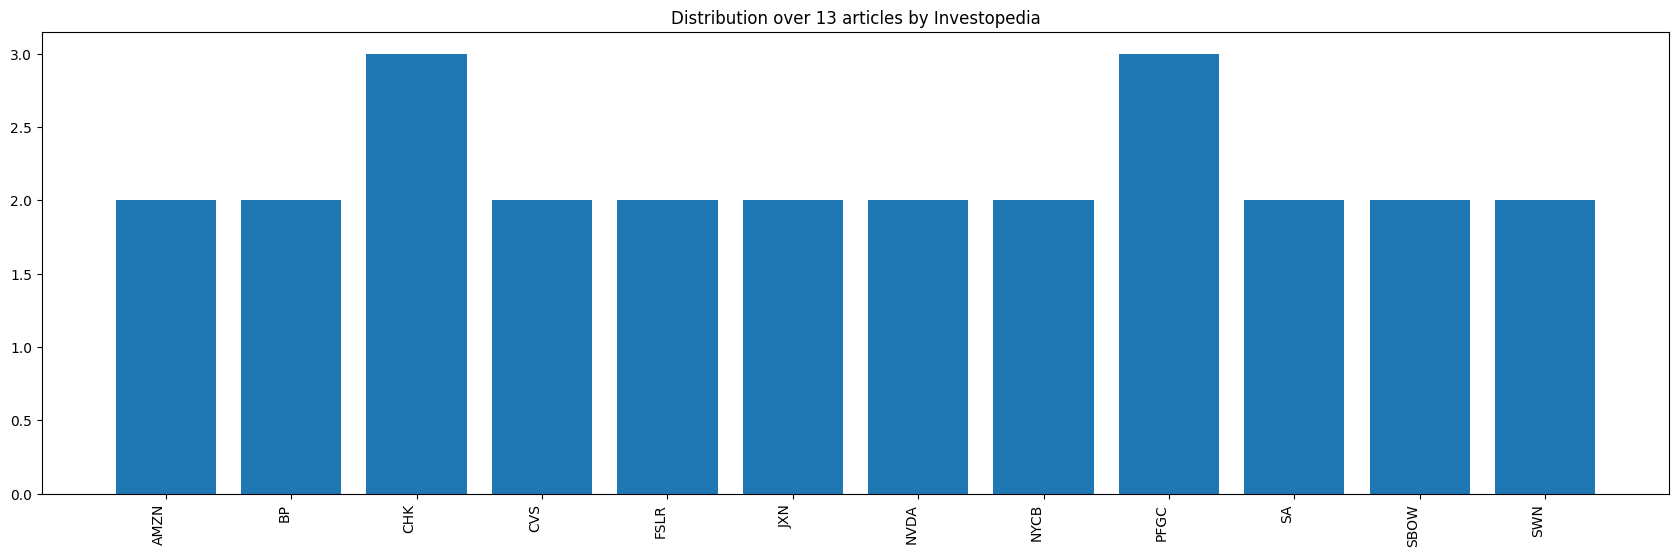

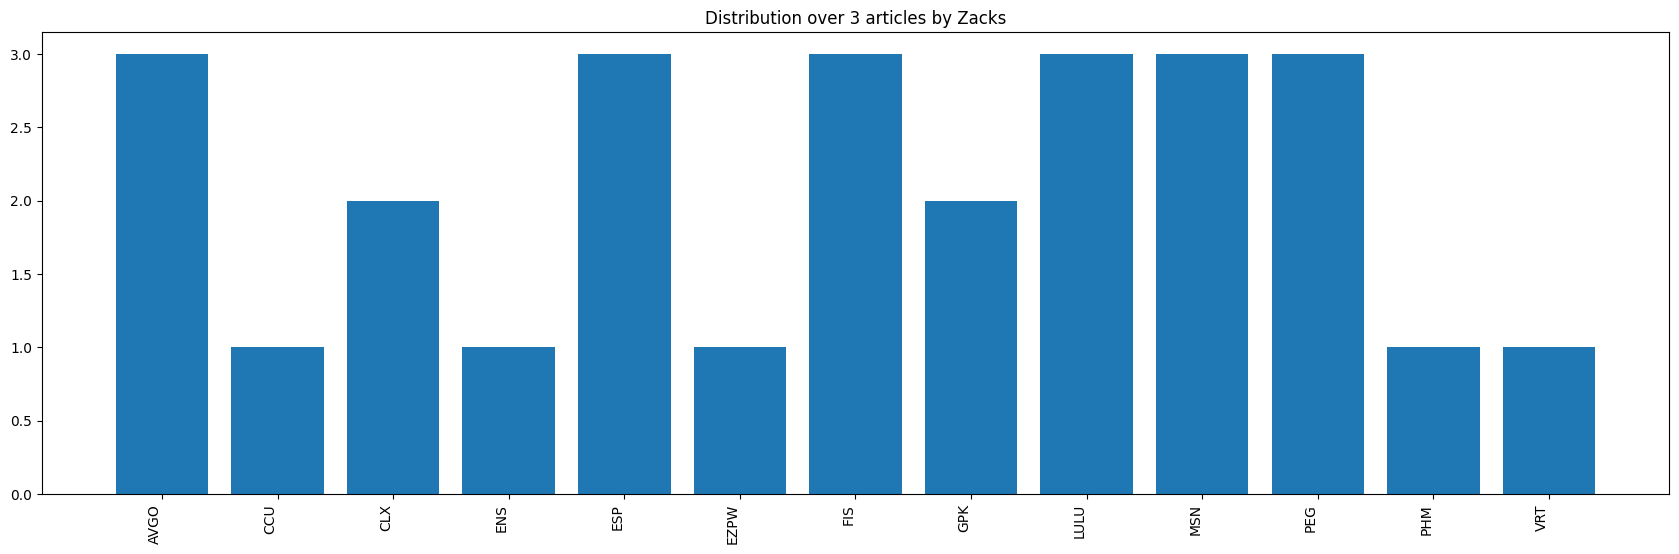

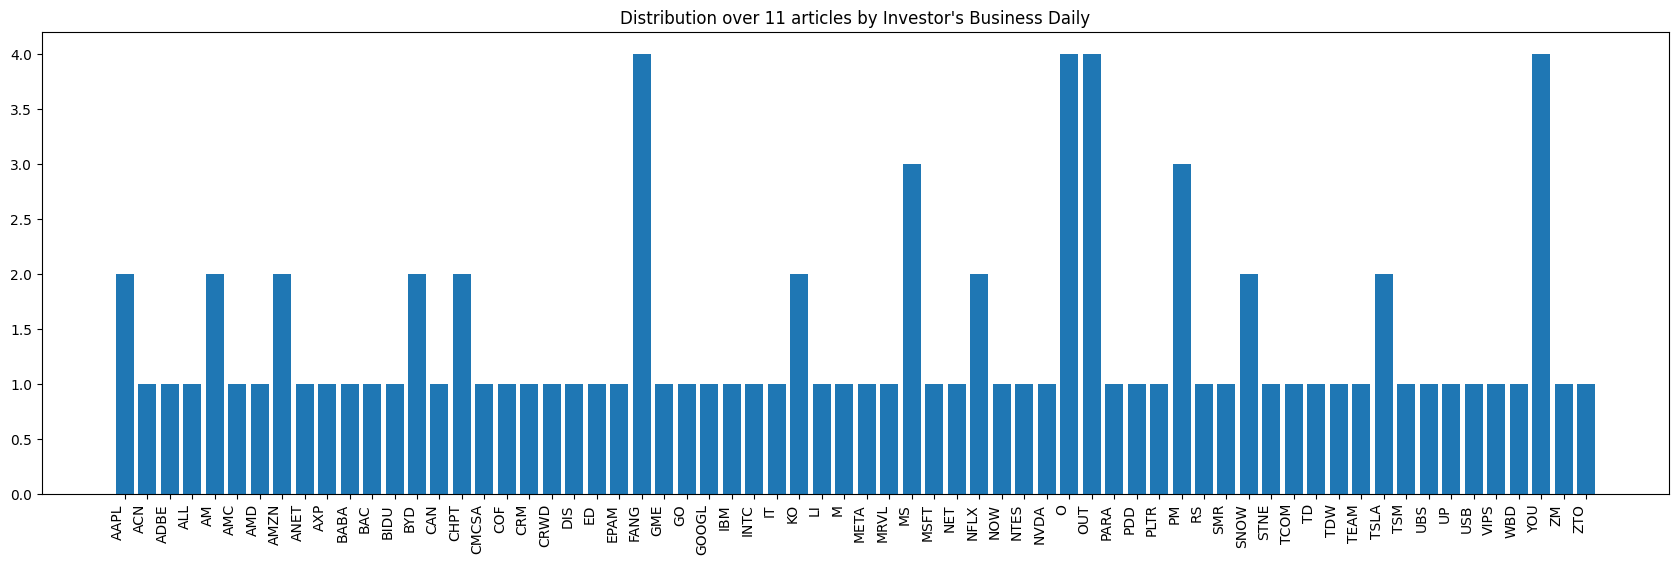

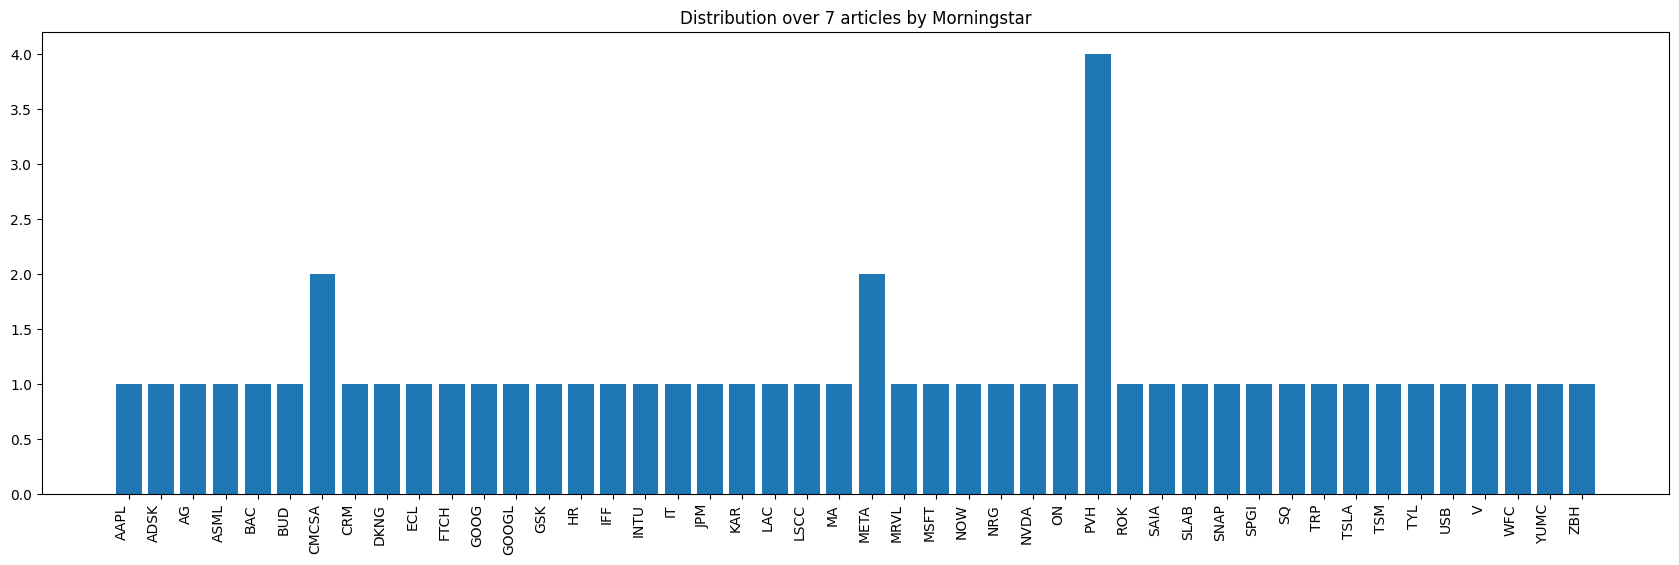

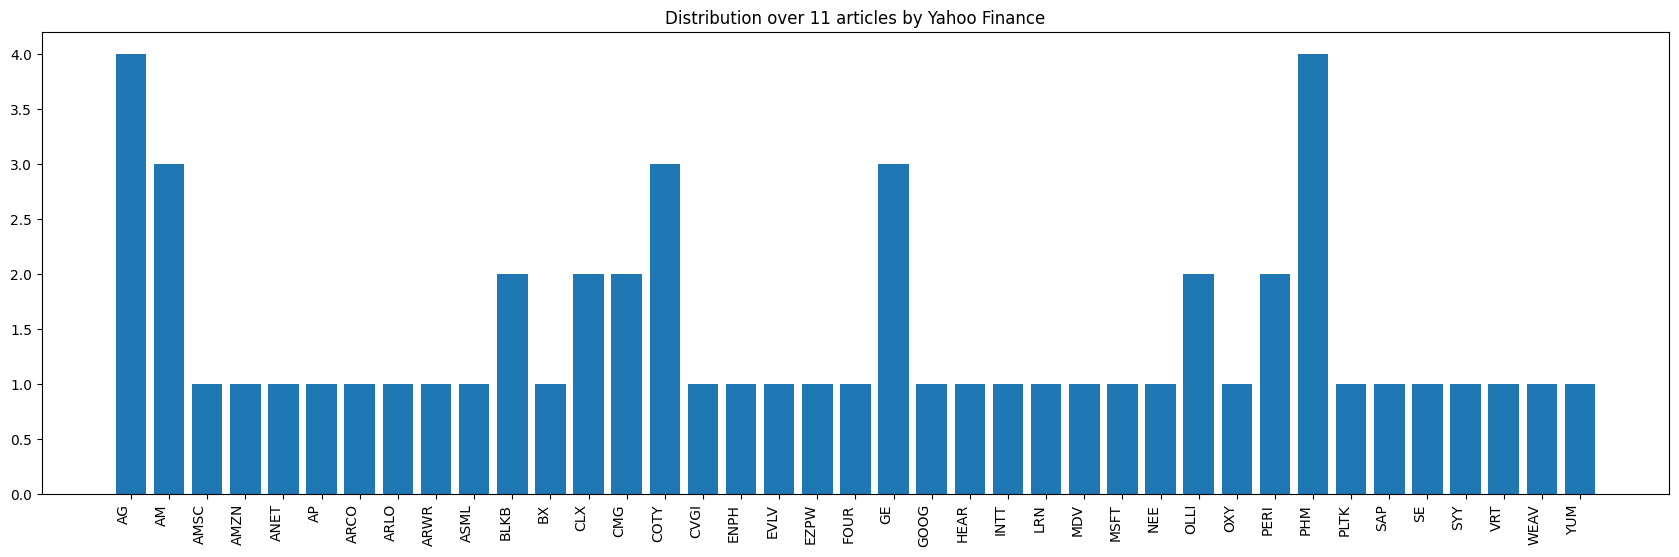

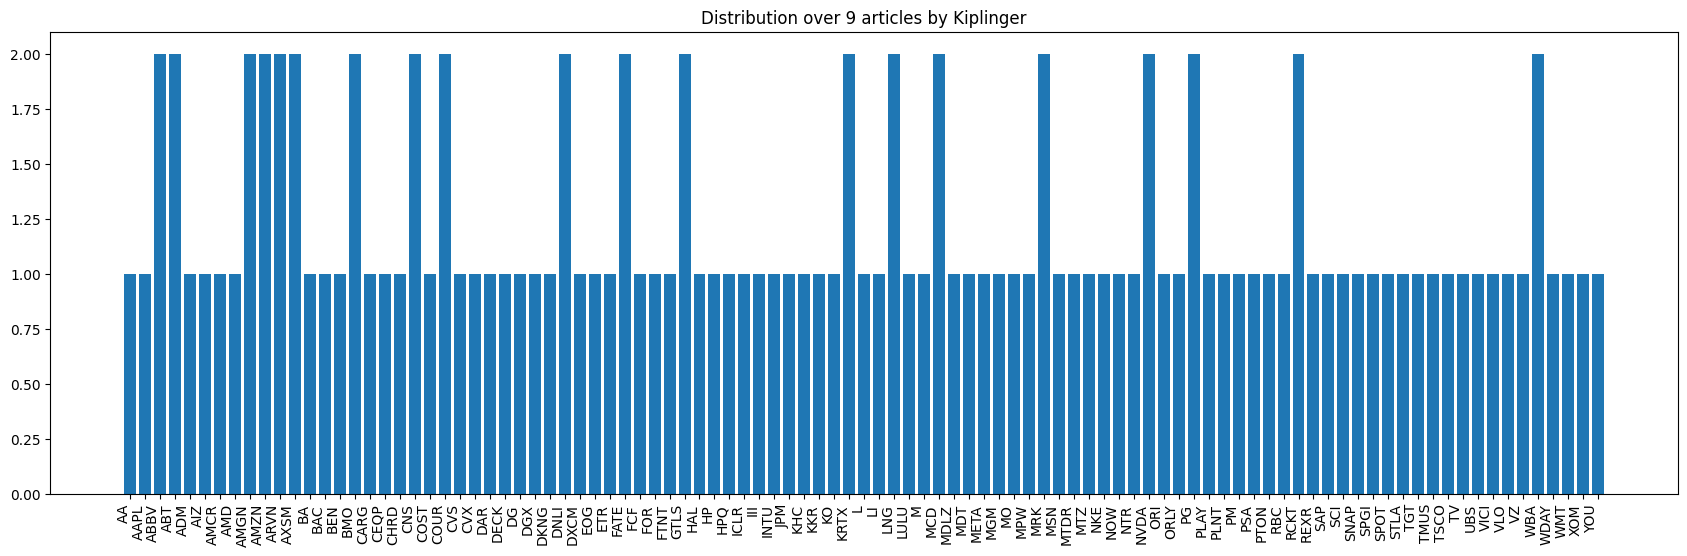

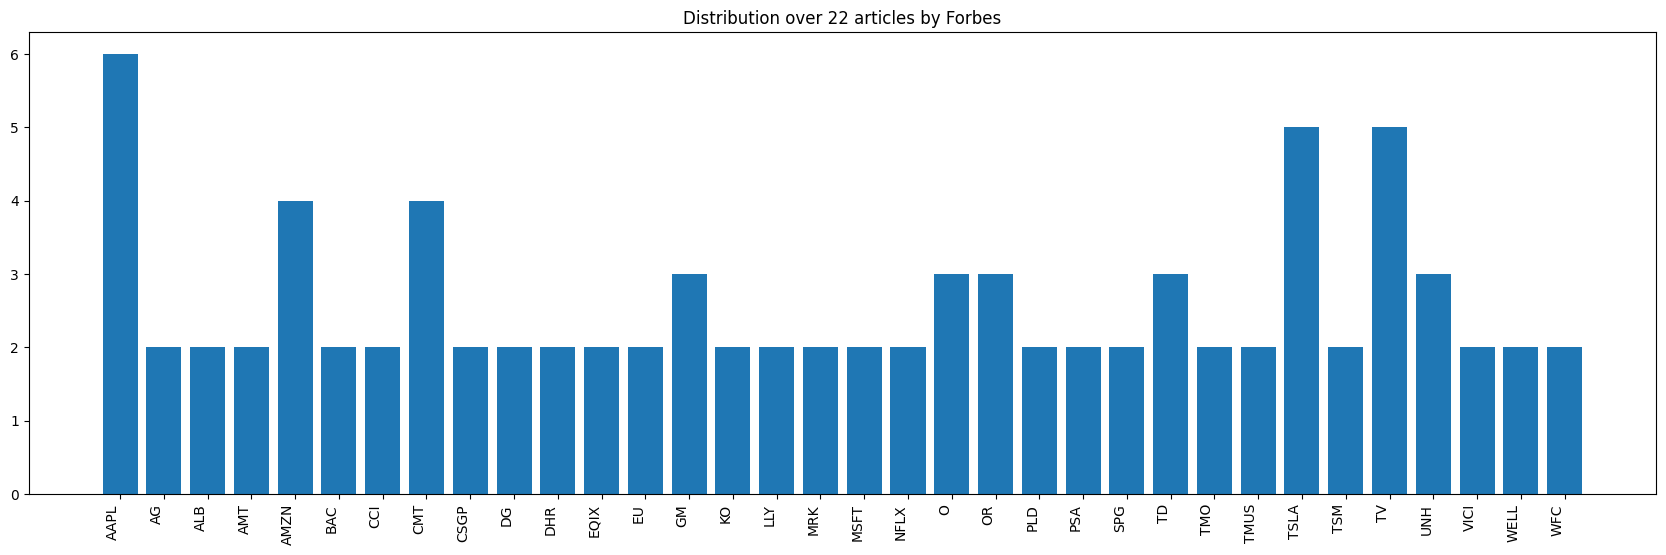

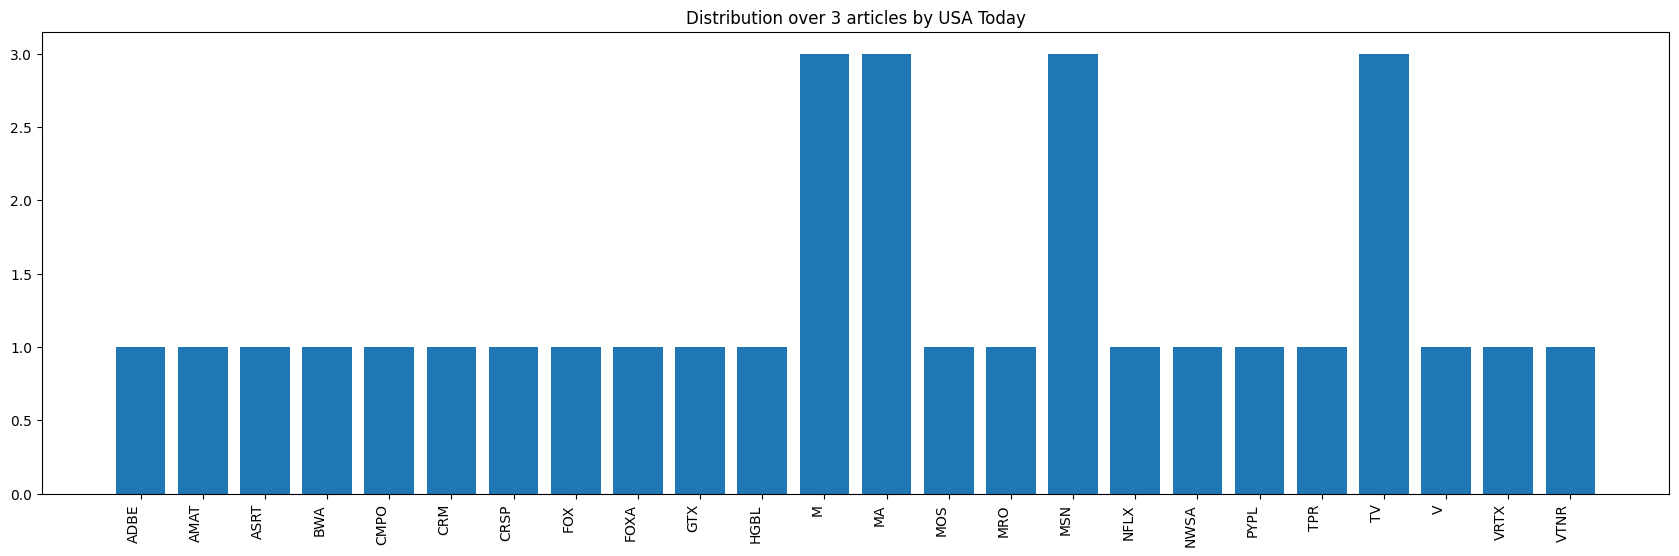

In [ ]:
for org in orgsList:
  orgData = data[data["Organization"] == org]
  uniDf = get_ticDist(orgData)
  
  #Remove counts greater than half articles
  if len(orgData) > 8:
    uniDf = uniDf[uniDf["count"] < len(orgData)/2]
  
  ticks = pd.concat([ticks, uniDf]).groupby(['tick']).sum().reset_index()

  #Remove counts of only 1
  if len(uniDf) > 100:
    uniDf = uniDf[uniDf["count"] > 1]

  
  if len(orgData) > 2:
    plt.title("Distribution over {} articles by {}".format(len(orgData), org))
    plt.xticks(rotation=90, ha='right')
    plt.bar(uniDf["tick"], uniDf["count"])
    plt.show()

In [ ]:
ticks = ticks[ticks["count"]> 5]

ticks.to_csv("picks.csv")
largeTicks = ticks.nlargest(60, "count")
largeTicks[30:]

,tick,count
4593,SA,8
4933,SQ,8
5129,TDOC,8
4026,PANW,8
5841,YOU,8
3682,NIO,8
3351,MELI,8
553,AVGO,7
3530,MSN,7
4184,PLTR,7


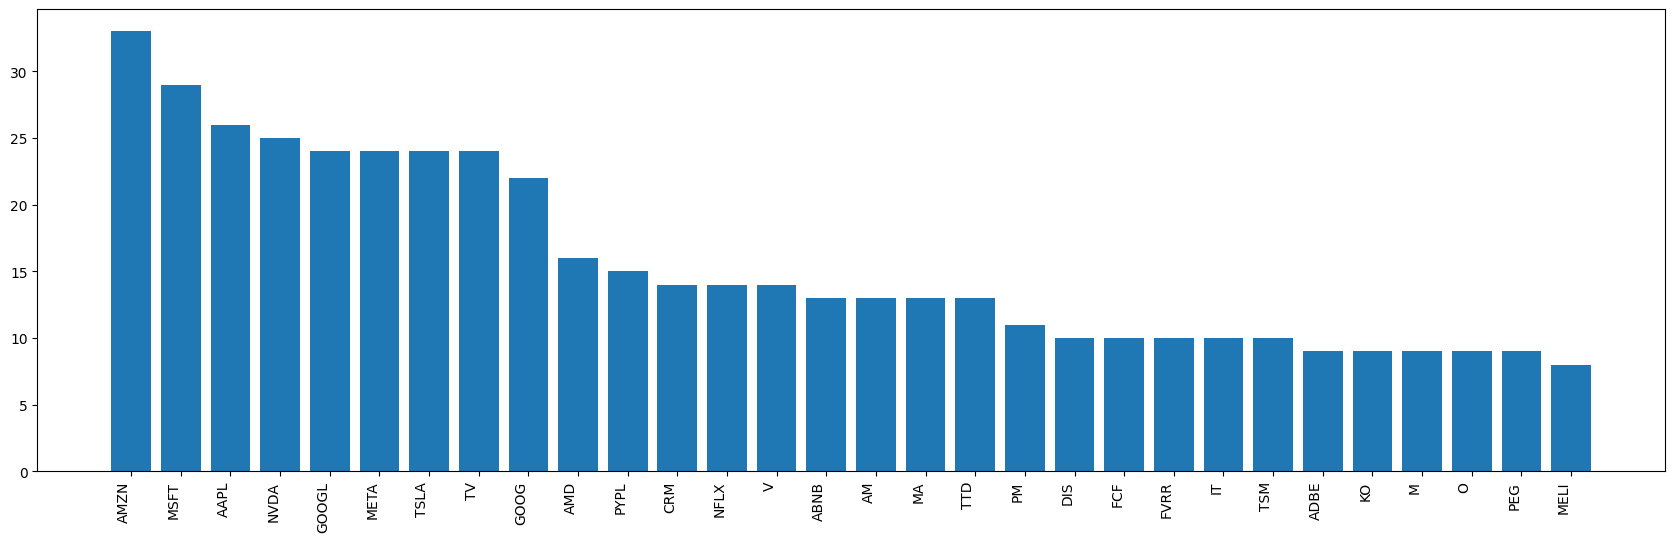

In [ ]:
plt.xticks(rotation=90, ha='right')
plt.bar(largeTicks["tick"], largeTicks["count"])
plt.show()

Our Picks:


1.   SOFI
2.   GME
3.   LCID
4.   NVDA
5.   AMD





